# **Mall Customer Segmentation**

## **I. Business Understanding**

This customer segmentation project aims to group our customers based on age, income, and spending habits so we can better meet their needs. By understanding these segments, we can create targeted marketing strategies, improve customer satisfaction, and use our resources more effectively. This approach helps us increase sales and build loyalty by offering each customer group products and experiences that match their preferences.

## **II. Data preparation**

### **1. Import libraries**

In [147]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### **2. Read files**

In [148]:
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [150]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [151]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [152]:
# Remove column Customer ID 
df.drop(columns='CustomerID', inplace=True)

In [153]:
# Renaming multiple columns
df.rename(columns={'Gender': 'gender','Age': 'age', 'Annual Income (k$)': 'annual_income_k$', 'Spending Score (1-100)': 'spending_score_range_100'}, inplace=True)

## **III. EDA**

### **1. Univariate Analysis**

**Gender**

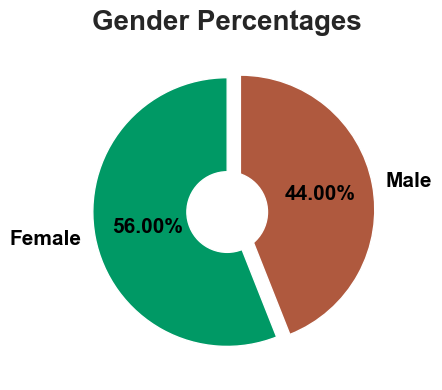

In [154]:
gender = df["gender"].value_counts()
colors = ['#009965', '#AF593E']
# Create subplots for bar plot and pie chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(gender, labels=gender.index, autopct="%.2f%%", textprops={"fontweight": "bold", "size": 15, "color": "black"},
       colors=colors, explode=[0, 0.1], startangle=90)
ax.add_artist(plt.Circle((0, 0), 0.3, fc='white'))  # Donut hole
ax.set_title("Gender Percentages", fontweight="bold", size=20, pad=10)
plt.tight_layout()
plt.show()

**Other numerical columns**

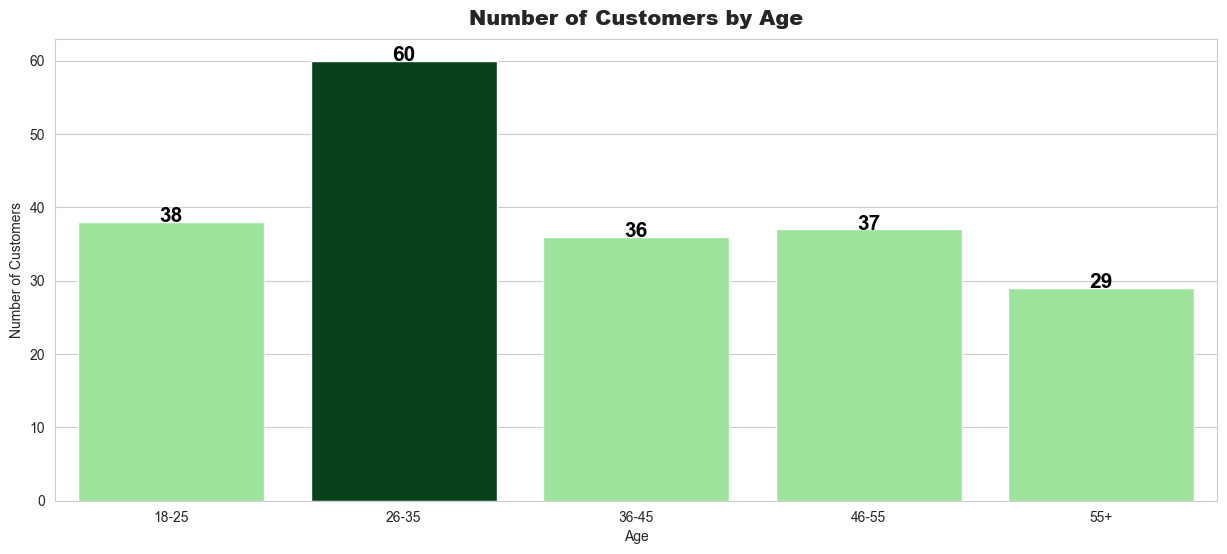

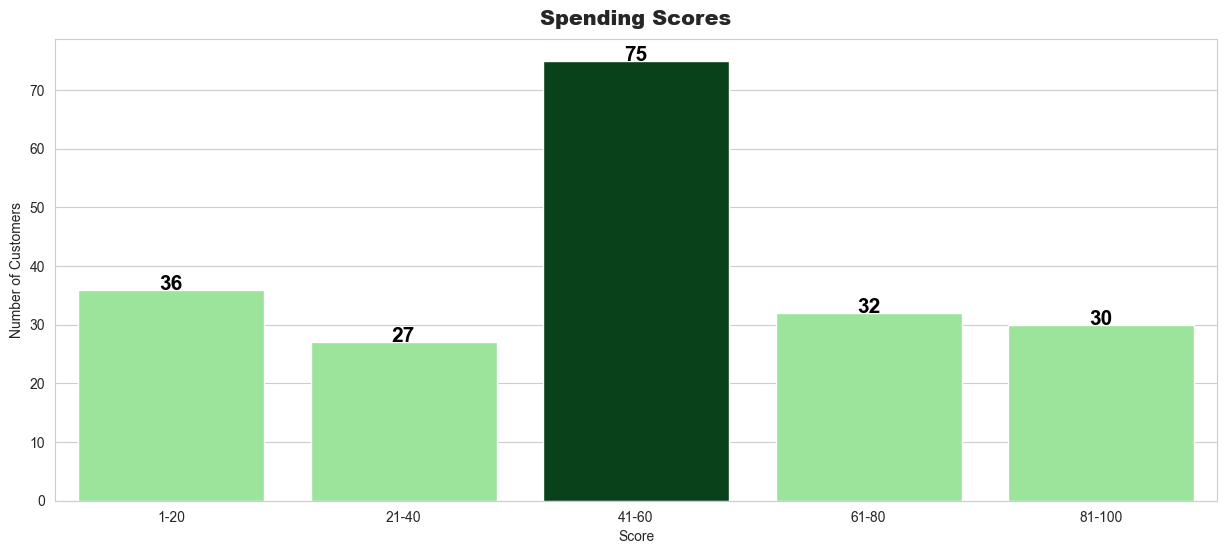

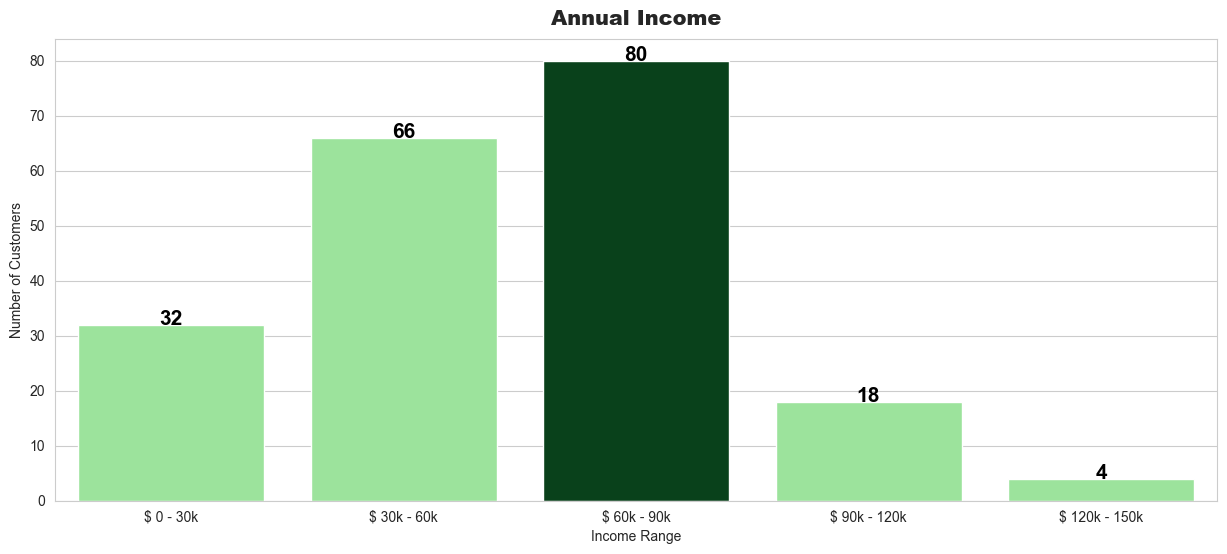

In [155]:
# Function to get frequency and palette
def get_freq_and_palette(data, ranges, highlight_color="#004A18", default_color="#90EF90"):
    freq = [len(data[(data >= lower) & (data <= upper)]) for lower, upper in ranges]
    max_freq = max(freq)
    colors = []
    for value in freq:
        if value == max_freq:
            colors.append(highlight_color)
        else:
            colors.append(default_color)
    return freq, colors

# Function to plot the bar chart
def plot_barchart(x_labels, y_values, colors, title, x_label, y_label):
    plt.figure(figsize=(15, 6))
    sns.barplot(x=x_labels, y=y_values, palette=colors, hue=x_labels)
    for idx, value in enumerate(y_values):
        plt.text(idx, value, str(value), ha="center", fontweight='bold', color='black', fontsize=15)
    plt.title(title, fontweight="black", size=15, pad=10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Data ranges and labels
age_ranges = [(18, 25), (26, 35), (36, 45), (46, 55), (56, float('inf'))]
age_labels = ["18-25", "26-35", "36-45", "46-55", "55+"]
score_ranges = [(1, 20), (21, 40), (41, 60), (61, 80), (81, 100)]
score_labels = ["1-20", "21-40", "41-60", "61-80", "81-100"]
income_ranges = [(0, 30), (31, 60), (61, 90), (91, 120), (121, 150)]
income_labels = ["$ 0 - 30k", "$ 30k - 60k", "$ 60k - 90k", "$ 90k - 120k", "$ 120k - 150k"]

# Plotting
age_freq, age_colors = get_freq_and_palette(df.age, age_ranges)
plot_barchart(age_labels, age_freq, age_colors, "Number of Customers by Age", "Age", "Number of Customers")

score_freq, score_colors = get_freq_and_palette(df['spending_score_range_100'], score_ranges)
plot_barchart(score_labels, score_freq, score_colors, "Spending Scores", "Score", "Number of Customers")

income_freq, income_colors = get_freq_and_palette(df['annual_income_k$'], income_ranges)
plot_barchart(income_labels, income_freq, income_colors, "Annual Income", "Income Range", "Number of Customers")

Overall, most customers come to this mall are in the age 23-35, spending score is around 41-60 and income range are in the middle, from $60-90K. 

### **2. Bivariate Analysis**

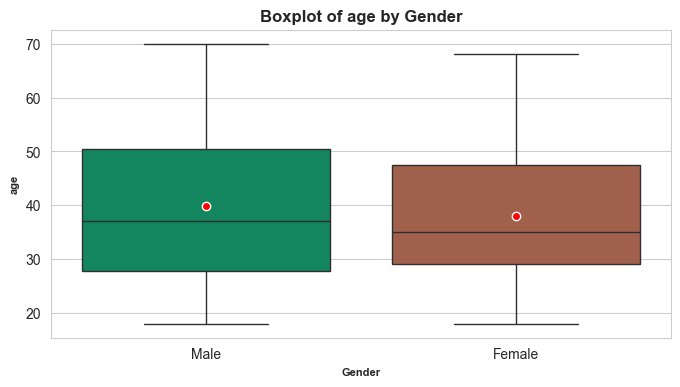

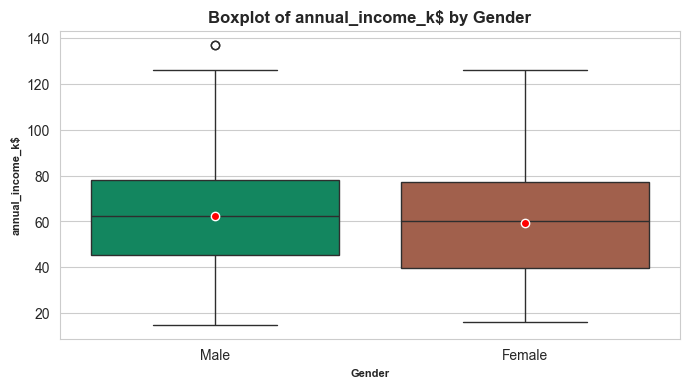

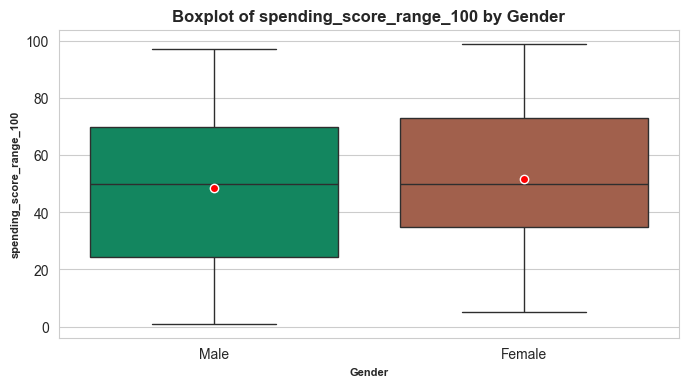

In [156]:
numerical_col = ['age', 'annual_income_k$', 'spending_score_range_100']
for col in numerical_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(
        data = df,
        x = 'gender',
        y = col,
        showmeans = True,
        meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "white"},
        palette=colors,
        hue='gender'
    )
    plt.title(f'Boxplot of {col} by Gender', fontweight='bold', fontsize=12)
    plt.xlabel('Gender', fontweight='bold', fontsize=8)
    plt.ylabel(f'{col}', fontweight='bold', fontsize=8)
    plt.show()

### **3. Multivariate Analysis**

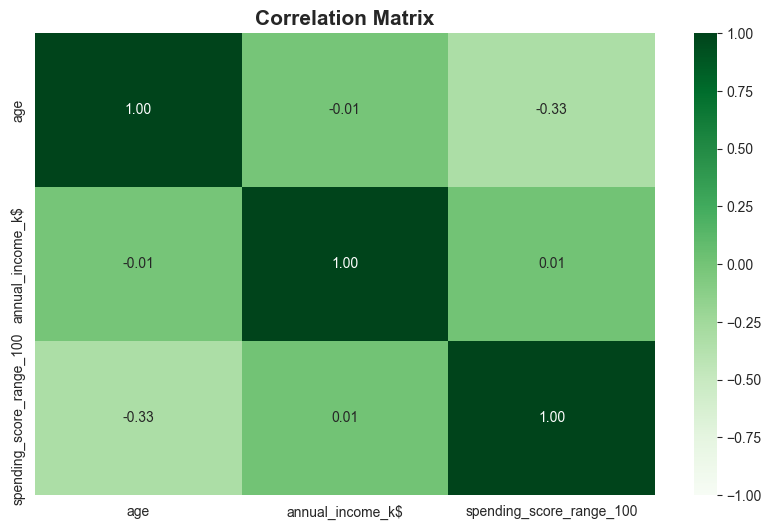

In [157]:
correlation = df[numerical_col].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='Greens', vmax=1, vmin=-1)
plt.title(f'Correlation Matrix', fontweight='bold', fontsize=15)
plt.show()

## **IV. Build Model**

C:\Users\ADMIN\PycharmProjects\pythonProjectBA\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1415: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


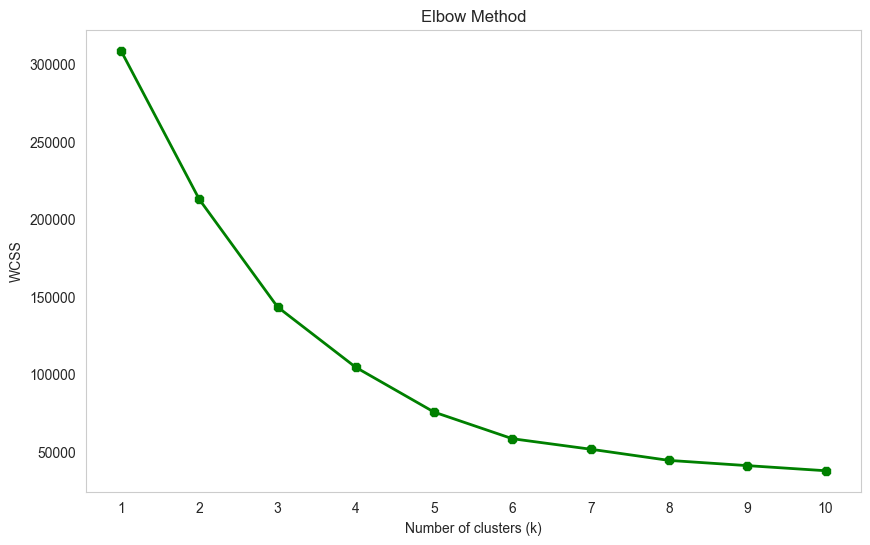

In [158]:
X = df.loc[:, numerical_col]
# Determine optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="green", marker ="8")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

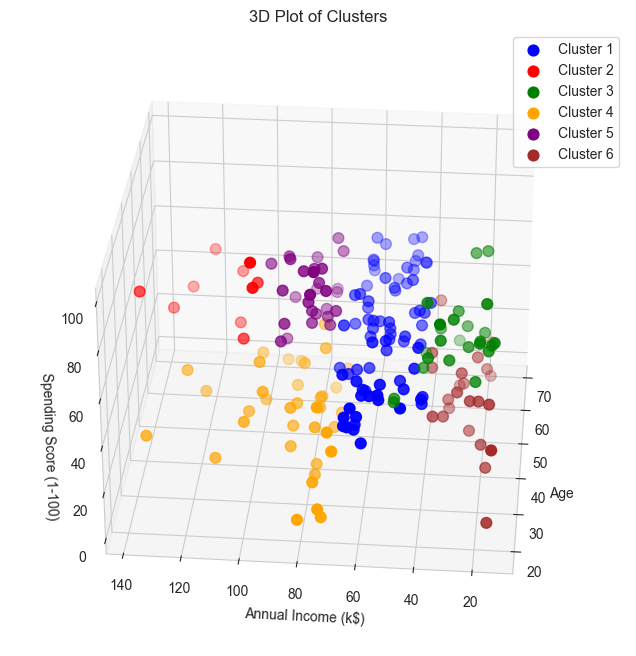

In [159]:
# Assume X and df are already defined (X is the dataset used for clustering, df is the original DataFrame)
km = KMeans(n_clusters=6, init="k-means++", random_state=42)
y_means_predict = km.fit_predict(X)
df['predict'] = y_means_predict
# Define colors for clusters
palette = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate(palette):
    ax.scatter(
        df.age[df.predict== i], 
        df["annual_income_k$"][df.predict == i], 
        df["spending_score_range_100"][df.predict == i], 
        c=color, s=60, label=f'Cluster {i+1}'
    )
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Plot of Clusters")
ax.view_init(30, 185)
plt.legend()
plt.show()

Now, I will create visualizations to better imagine about them. 

<Axes: xlabel='predict', ylabel='spending_score_range_100'>

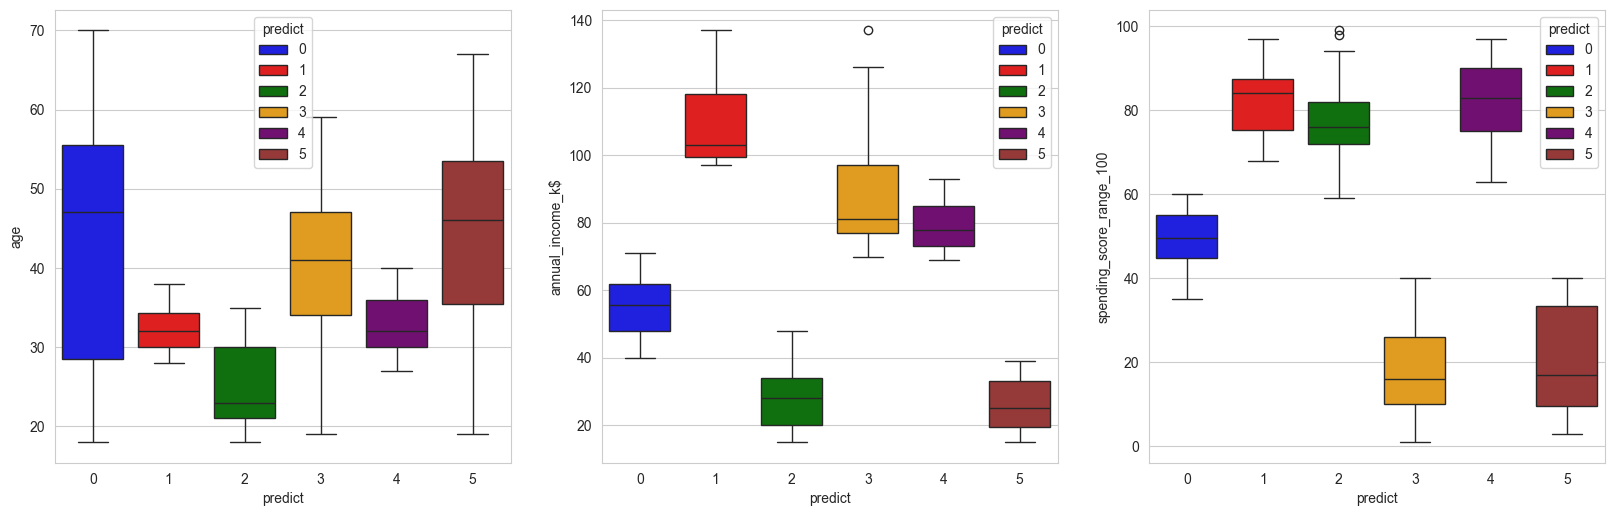

In [160]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
sns.boxplot(y='age',x='predict',data=df, palette=palette, hue='predict')
ax2 = fig.add_subplot(3,3,2)
sns.boxplot(y='annual_income_k$',x='predict',data=df, palette=palette, hue='predict')
ax3 = fig.add_subplot(3,3,3)
sns.boxplot(y='spending_score_range_100',x='predict',data=df, palette=palette, hue='predict')

## **V. Insights and Recommendations**

#### **1st Group (Low Income, Medium Spending)**
- **Insight**: These customers have low incomes but moderate spending scores, indicating that they may be price-sensitive yet interested in occasional purchases. They might appreciate discounts or bundled offers.
- **Recommendation**: Target this group with budget-friendly products or seasonal promotions to encourage repeat purchases. Loyalty programs with rewards for frequent purchases may also increase engagement.

#### **2nd Group (Young Affluent - High Income, High Spending)**
- **Insight**: This group is young, affluent, and has a high spending score, indicating they are likely open to luxury or premium products and experiences.
- **Recommendation**: Focus on premium products and exclusive offerings for this segment. Highlight unique features, brand exclusivity, or social status appeal in marketing. Providing personalized experiences, such as private shopping events or early access to new products, could increase loyalty.

#### **3rd Group (Young with Low Income, High Spending)**
- **Insight**: Although they have low incomes, they exhibit high spending scores, suggesting a willingness to spend a significant portion of their income on specific categories.
- **Recommendation**: Offer affordable yet stylish or trendy products that resonate with their lifestyle. Subscription-based services or “buy now, pay later” options might appeal to this group, allowing them to manage their spending over time.

#### **4th Group (Varying Age, Moderate Income, Low Spending)**
- **Insight**: This group has moderate income but low spending scores, possibly indicating limited interest in high-end products or budget-conscious tendencies.
- **Recommendation**: Use a value-driven marketing strategy. Emphasize quality and durability over luxury, and consider targeted promotions to motivate spending. Bundled deals or targeted reminders about special sales could encourage engagement.

#### **5th Group (Young, Moderate Income, High Spending)**
- **Insight**: These are younger customers with moderate incomes who still have a high spending score, suggesting they value quality or unique experiences within their budget.
- **Recommendation**: Position mid-tier, quality-focused products to this group. Marketing campaigns emphasizing value for money, combined with occasional luxury, could resonate well. Limited-time offers on premium products at a discount may also attract this segment.

#### **6th Group (Varying Age, Lowest Income, Lowest Spending)**
- **Insight**: With the lowest income and spending scores, this group is likely budget-conscious and possibly disengaged from luxury or high-end products.
- **Recommendation**: Focus on budget-friendly offerings or essential items to appeal to this group. Promotional campaigns should highlight affordability and basic utility. Consider using broader appeal campaigns, like "best value" or "everyday essentials," to attract attention without expecting high spending.

-> **Target Customers**: Based on spending potential, prioritize Groups 2 and 5 as primary targets, as they show higher spending tendencies within their income brackets. Additionally, Group 3 can be secondary due to their willingness to spend despite low income.